# Yêu cầu 1

Cài đặt thư viện

In [1]:
!pip install gensim

In [2]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

warnings.filterwarnings(action='ignore')

Tính vector trung bình cho một câu.

In [3]:
def AverageVector(s, M):
    words = s.split()
    vectors = [M.wv[word] for word in words if word in M.wv]
    if len(vectors) == 0:
        return np.zeros(M.vector_size)
    return np.mean(vectors, axis=0)

Tính toán độ tương tự của câu đầu vào với các câu trong tập dữ liệu.

In [4]:
def MostSimilarSentence(X, S, M):
    X_vector = AverageVector(X, M)
    most_similar_sentence = None
    max_similarity = -1
    for s in S:
        vector = AverageVector(s, M)
        if np.all(X_vector == 0) or np.all(vector == 0):
            continue
        similarity = np.dot(X_vector, vector)/(np.linalg.norm(X_vector)*np.linalg.norm(vector))
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_sentence = s
    return most_similar_sentence, max_similarity

Cho 1 tập các câu gọi là S = {s1, s2, …, sn}.
Nhập vào 1 câu X, hãy tìm câu si nào đó trong tập S mà tương tự với X nhiều nhất
bold text

In [5]:
# Tập các sentences S
S = ["This is a cat", "That is a dog", "I love cats and dogs", "Cats are cute",
     "Dogs are loyal pets", "I have a pet cat", "The cat is sleeping",
     "I am allergic to dogs", "She is playing with her pet bird",
     "We like rabbits", "She has an adorable dog"]

# Chuyển đổi các câu thành danh sách các từ
S_token = [sentence.split() for sentence in S]

In [6]:
# Xây dựng mô hình Word2Vec theo CBOW
M_1 = Word2Vec(S_token, sg=0, min_count=1)

# Xây dựng mô hình Word2Vec theo Skip-gram
M_2 = Word2Vec(S_token, sg=1, min_count=1)

In [7]:
# Nhập câu X từ bàn phím.
X = input("Nhập X: ")

print("\n----------- Kết quả theo mô hình CBOW: -----------")
most_similar_1, similarity_1 = MostSimilarSentence(X, S, M_1)
print("Câu tương tự nhất:", most_similar_1)
print("Độ tương tự:", similarity_1)

print("\n----------- Kết quả theo mô hình Skip-gram: -----------")
most_similar_2, similarity_2 = MostSimilarSentence(X, S, M_2)
print("Câu tương tự nhất:", most_similar_2)
print("Độ tương tự:", similarity_2)

Nhập X: bird

----------- Kết quả theo mô hình CBOW: -----------
Câu tương tự nhất: She is playing with her pet bird
Độ tương tự: 0.26513693

----------- Kết quả theo mô hình Skip-gram: -----------
Câu tương tự nhất: She is playing with her pet bird
Độ tương tự: 0.2651071


# Yêu cầu 2

Khai báo các thư viện và tải xuống một tập tin CSV "facebook_comment_2k7.csv" từ URL được cung cấp:

In [8]:
import requests

url = "https://drive.google.com/uc?export=download&id=1pMwMc89Ff_TOAiEcJe8Hm0ZLtJxeHQiC"
response = requests.get(url)

with open("facebook_comment_2k7.csv", "wb") as f:
    f.write(response.content)

In [10]:
import pandas as pd

data = pd.read_csv("facebook_comment_2k7.csv")

print(data.shape)
data.head(10)

(2700, 4)


,Unnamed: 0,id,text,label
0,0,3113b477-4ea3-4c3f-82d7-6ae6b8c12a3b,Noi cho biet k rãnh viet voi loai ng nhu chị c...,['harassment']
1,1,de5cf256-3879-413d-9e33-2c3be7e2e0c1,-Giải ngân cực nhanh\n-mức vay lên đến 15tr\n👉...,['dangerous_content']
2,2,975a369c-acc2-487c-84dd-64a4764203cf,Thủ tục đơn giản đăng ký khoản vay giải ngân l...,['dangerous_content']
3,3,45aa9b39-c58a-4c91-941a-fe6373d009f5,săn mãi con đen v5 cả tối k đc an ủi đc con be...,['normal']
4,4,99f6d7e6-b1c0-4849-9430-c60137737ead,zalo 0375841653 ae nào mua kết bạn zalo đặt hà...,['dangerous_content']
5,5,6be18392-e2fc-4cb1-8141-50c62309c263,AE nào mua tiền giả kết bạn zalo 0375841653 U...,['dangerous_content']
6,6,6c6365bd-d896-40aa-af7b-9b278b514d03,"Dạ M2 có ạ , mời bạn ghé qua chi nhánh M2 bigC...",['normal']
7,7,cbc9a9cc-2928-49a6-989f-7577978eb302,Em chi đặt 2 thùng mà 4 ngày chưa nhận được em!,['normal']
8,8,2fc630ec-b90e-4927-9820-e882030419b6,Cụ bà said: biết thế k đẻ ra thằng bố nó để gi...,['hate_speech']
9,9,0dc1c1ce-d497-4074-8b57-51a67406547b,Nguyễn Hồng Thúy em bơm mông vs zú hông ?? Fre...,['sexaully_explixit']


In [11]:
# Tách các nhãn thành các nhãn chính
data['label'] = data['label'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))
data['label'] = data['label'].apply(lambda x: [label.strip() for label in x])
# Tạo DataFrame mới với mỗi dòng là một nhãn chính
data = data.explode('label')
counts = data['label'].value_counts()

In [12]:
print(counts)
print(data.shape)

label
normal               1595
hate_speech           456
dangerous_content     281
harassment            236
sexaully_explixit     222
Name: count, dtype: int64
(2790, 4)


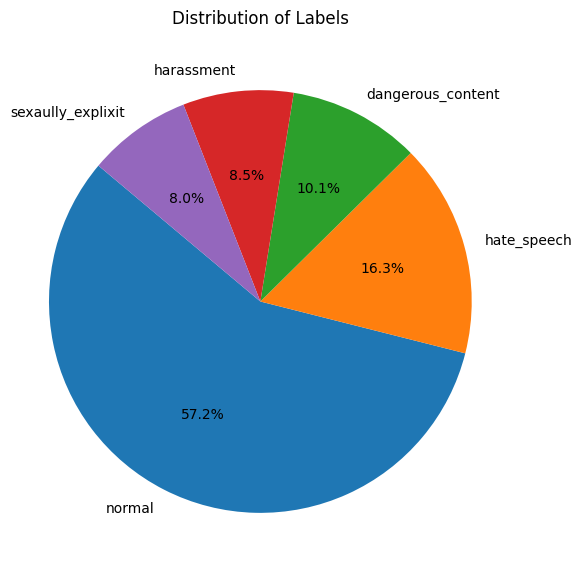

In [13]:
# Biểu đồ trực quan
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

Huấn luyện mô hình

In [14]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], \
                                                    test_size=0.2,random_state=42)

In [15]:
# Vector hóa văn bản sử dụng TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
# Huấn luyện mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

In [18]:
# Huấn luyện mô hình Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

In [19]:
# Huấn luyện mô hình Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

In [20]:
# Huấn luyện mô hình Support Vector Machine

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

In [21]:
# Huấn luyện mô hình Multilayer Perceptron

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, \
                    activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_tfidf, y_train)
y_pred_mlp = mlp.predict(X_test_tfidf)

Đánh giá các mô hình

In [22]:
from sklearn.metrics import classification_report

# Đánh giá mô hình Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Đánh giá mô hình Naive Bayes
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Đánh giá mô hình Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Đánh giá mô hình Support Vector Machine
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

# Đánh giá mô hình Multilayer Perceptron
print("Multilayer Perceptron:")
print(classification_report(y_test, y_pred_mlp))

Logistic Regression:
                   precision    recall  f1-score   support

dangerous_content       1.00      0.73      0.84        59
       harassment       0.71      0.10      0.17        52
      hate_speech       0.64      0.61      0.63        83
           normal       0.77      0.99      0.87       325
sexaully_explixit       0.88      0.18      0.30        39

         accuracy                           0.77       558
        macro avg       0.80      0.52      0.56       558
     weighted avg       0.78      0.77      0.72       558

Naive Bayes:
                   precision    recall  f1-score   support

dangerous_content       1.00      0.71      0.83        59
       harassment       0.00      0.00      0.00        52
      hate_speech       0.62      0.24      0.35        83
           normal       0.68      1.00      0.81       325
sexaully_explixit       0.67      0.05      0.10        39

         accuracy                           0.70       558
        macro avg

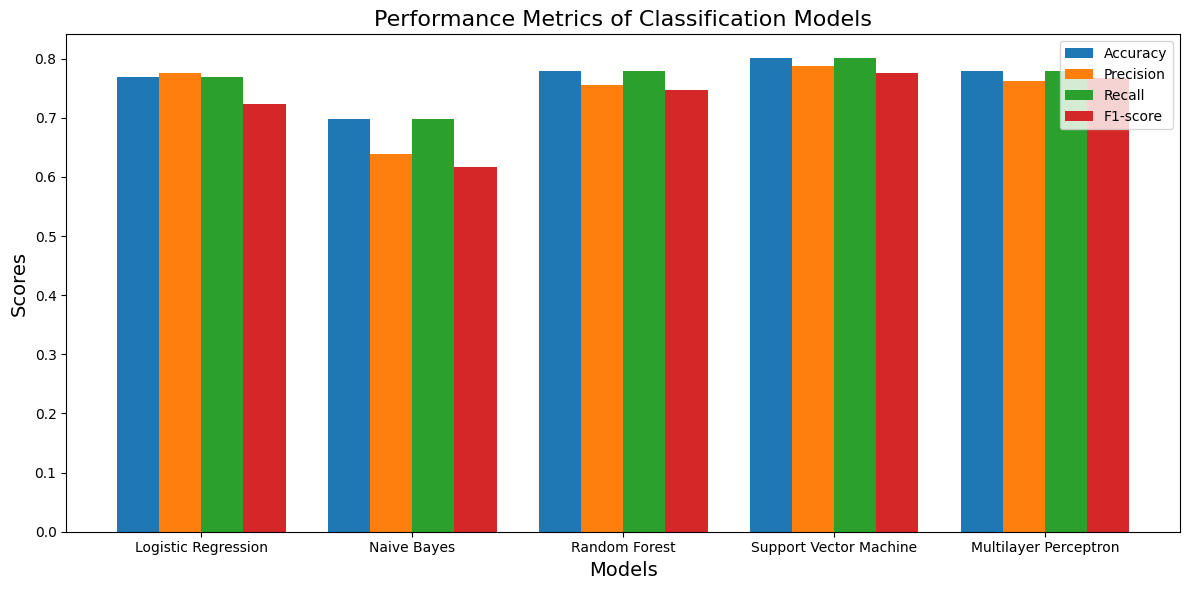

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Các mô hình và các metric
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'Multilayer Perceptron']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Tính toán các giá trị metric
accuracy_scores = [accuracy_score(y_test, y_pred_lr),
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred_svm),
                   accuracy_score(y_test, y_pred_mlp)]

precision_scores = [precision_score(y_test, y_pred_lr, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_nb, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
                    precision_score(y_test, y_pred_mlp, average='weighted', zero_division=0)]

recall_scores = [recall_score(y_test, y_pred_lr, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_nb, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_rf, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_svm, average='weighted', zero_division=0),
                 recall_score(y_test, y_pred_mlp, average='weighted', zero_division=0)]

f1_scores = [f1_score(y_test, y_pred_lr, average='weighted', zero_division=0),
             f1_score(y_test, y_pred_nb, average='weighted', zero_division=0),
             f1_score(y_test, y_pred_rf, average='weighted', zero_division=0),
             f1_score(y_test, y_pred_svm, average='weighted', zero_division=0),
             f1_score(y_test, y_pred_mlp, average='weighted', zero_division=0)]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, accuracy_scores, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_scores, bar_width, label='Precision')
plt.bar(index + 2*bar_width, recall_scores, bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_scores, bar_width, label='F1-score')

plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance Metrics of Classification Models', fontsize=16)
plt.xticks(index + 1.5*bar_width, models)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Dự đoán nhãn cho các văn bản mới sử dụng các mô hình đã huấn luyện

In [26]:
# Nhập đoạn văn bản từ người dùng
input_text = input("Nhập đoạn văn bản: ")

# Vector hóa đoạn văn bản đầu vào
input_text_tfidf = vectorizer.transform([input_text])

# Logistic Regression
predicted_label_lr = lr.predict(input_text_tfidf)
print("Logistic Regression - Predicted label:", predicted_label_lr)

# Naive Bayes
predicted_label_nb = nb.predict(input_text_tfidf)
print("Naive Bayes - Predicted label:", predicted_label_nb)

# Random Forest
predicted_label_rf = rf.predict(input_text_tfidf)
print("Random Forest - Predicted label:", predicted_label_rf)

# Support Vector Machine
predicted_label_svm = svm.predict(input_text_tfidf)
print("Support Vector Machine - Predicted label:", predicted_label_svm)

# Multilayer Perceptron
predicted_label_mlp = mlp.predict(input_text_tfidf)
print("Multilayer Perceptron - Predicted label:", predicted_label_mlp)

Nhập đoạn văn bản: đéo
Logistic Regression - Predicted label: ['hate_speech']
Naive Bayes - Predicted label: ['hate_speech']
Random Forest - Predicted label: ['hate_speech']
Support Vector Machine - Predicted label: ['hate_speech']
Multilayer Perceptron - Predicted label: ['hate_speech']


Phân tích khả năng của mỗi mô hình trong việc dự đoán các câu chứa từ ngữ khiêu khích hoặc tiêu cực

In [27]:
# Dữ liệu test
test_data = ["thằng chó này!", "tao đập chết mẹ mày", "Bố m lại ỉa vào mồm m", "Cái thằng nguu này"
, "câm mồm!", "m bị hâm à!","thang nhai nay nhay vcl", "Thằng này thực sự là một tên ngốc!",
"Đm, mày làm tao tức quá!", "Mày không đủ trình độ để nói chuyện với tao.", "Chém chết thằng này đi!",
"Đồ mất dạy!", "Mày nghĩ tao sợ mày à?", "Đm, mày đúng là thằng ngu!", "Mày là thằng thất bại nhất trong số chúng ta!"
, "Mày cút đi, đừng làm phiền tao!", "Mày chỉ là một con lợn!", "Nói gì nữa cũng không hiểu, mày quá ngu ngốc!"
, "Tao ghét mày đến chết!", "Đồ mất dạy! Biết xấu hổ không?"]

# Số câu và số câu dự đoán là "Hate speech" cho mỗi mô hình
total_sentences = len(test_data)
hate_speech_count_lr = 0
hate_speech_count_nb = 0
hate_speech_count_rf = 0
hate_speech_count_svm = 0
hate_speech_count_mlp = 0

# Duyệt qua mỗi câu trong test_data
for sentence in test_data:
    # Vector hóa câu
    sentence_tfidf = vectorizer.transform([sentence])

    # Dự đoán nhãn của câu cho mỗi mô hình
    predicted_label_lr = lr.predict(sentence_tfidf)
    predicted_label_nb = nb.predict(sentence_tfidf)
    predicted_label_rf = rf.predict(sentence_tfidf)
    predicted_label_svm = svm.predict(sentence_tfidf)
    predicted_label_mlp = mlp.predict(sentence_tfidf)

    # Nếu câu được dự đoán là "Hate speech", tăng biến đếm tương ứng lên 1
    if predicted_label_lr[0] == "hate_speech":
        hate_speech_count_lr += 1
    if predicted_label_nb[0] == "hate_speech":
        hate_speech_count_nb += 1
    if predicted_label_rf[0] == "hate_speech":
        hate_speech_count_rf += 1
    if predicted_label_svm[0] == "hate_speech":
        hate_speech_count_svm += 1
    if predicted_label_mlp[0] == "hate_speech":
        hate_speech_count_mlp += 1

# In ra kết quả
print("Tổng số câu trong dữ liệu test:", total_sentences)
print("Số câu được dự đoán là 'Hate speech' (Logistic Regression):", hate_speech_count_lr)
print("Số câu được dự đoán là 'Hate speech' (Naive Bayes):", hate_speech_count_nb)
print("Số câu được dự đoán là 'Hate speech' (Random Forest):", hate_speech_count_rf)
print("Số câu được dự đoán là 'Hate speech' (Support Vector Machine):", hate_speech_count_svm)
print("Số câu được dự đoán là 'Hate speech' (Multilayer Perceptron):", hate_speech_count_mlp)

Tổng số câu trong dữ liệu test: 20
Số câu được dự đoán là 'Hate speech' (Logistic Regression): 14
Số câu được dự đoán là 'Hate speech' (Naive Bayes): 8
Số câu được dự đoán là 'Hate speech' (Random Forest): 8
Số câu được dự đoán là 'Hate speech' (Support Vector Machine): 14
Số câu được dự đoán là 'Hate speech' (Multilayer Perceptron): 11
